In [102]:
import pandas as pd
import numpy as np

In [111]:
df2 = pd.read_csv('cleaned.csv')

In [112]:
X = df2['post_text']       
y = df2['label']
print(f"Rows: {len(df2)} | NaN in text: {X.isnull().sum()} | NaN in label: {y.isnull().sum()}")

Rows: 19483 | NaN in text: 0 | NaN in label: 0


In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV 
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix)

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_raw = df2['post_text'].astype(str)      
y     = df2['label']
# Train / test split (raw text!)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.20, random_state=42, stratify=y
)
print(f"Train size: {len(X_train_raw)}, Test size: {len(X_test_raw)}")

Train size: 15586, Test size: 3897


In [115]:
from sklearn.model_selection import (
    cross_val_score, StratifiedKFold, train_test_split
)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    pipe_char, X_raw, y,      
    cv=cv,
    scoring='f1_macro',
    n_jobs=-1
)

print("\n=== 5-FOLD CV RESULTS (F1-macro) ===")
print(f"Mean F1 : {scores.mean():.4f}")
print(f"Std     : {scores.std():.4f}")
print(f"Scores  : {scores.round(4)}")


=== 5-FOLD CV RESULTS (F1-macro) ===
Mean F1 : 0.8939
Std     : 0.0053
Scores  : [0.895  0.8943 0.8871 0.8903 0.9027]


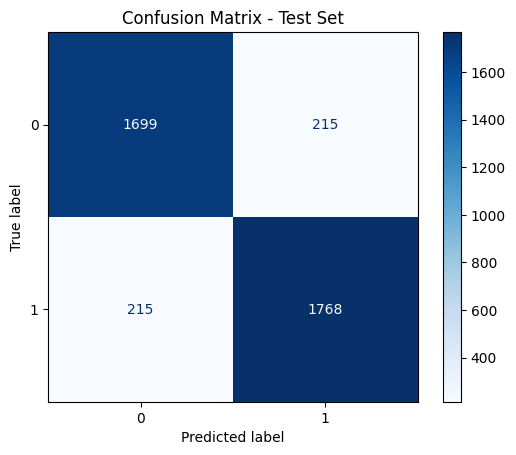

In [116]:
# --- TRAIN THE MODEL ---
pipe_char.fit(X_train_raw, y_train)

# --- MAKE PREDICTIONS ---
y_pred = pipe_char.predict(X_test_raw)

# --- NOW YOU CAN PLOT ---
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [117]:
print("\n=== FINAL TEST SET REPORT ===")
print(classification_report(y_test, y_pred, digits=3))


=== FINAL TEST SET REPORT ===
              precision    recall  f1-score   support

           0      0.888     0.888     0.888      1914
           1      0.892     0.892     0.892      1983

    accuracy                          0.890      3897
   macro avg      0.890     0.890     0.890      3897
weighted avg      0.890     0.890     0.890      3897

